<a href="https://colab.research.google.com/github/intheblueside/spotify-popularity/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np

file_path = '/content/drive/MyDrive/dataset_afterCleaning.csv'
df = pd.read_csv(file_path)

df.head()


,track_id,artists,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,time_signature,explicit_encoded,track_genre_encoded,intensity,liveliness,grooviness
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,1.728257,0.189645,0.597905,-0.879549,-1.210910,0.142555,-1.367606,1.647794,...,-0.293978,1.067265,0.806275,-1.171010,0.0,-0.335674,-0.621248,0.713317,-0.185137,-0.266391
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,0.919403,-1.065350,-1.023709,-2.187129,-1.210910,-2.938252,0.731205,0.158913,...,-0.293735,-0.708863,-1.022838,-1.521623,0.0,-0.335674,-0.621248,0.879661,-1.415138,-2.245726
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,1.009275,-0.117539,-0.909690,-1.331662,-1.492264,-0.735074,0.731205,-0.300921,...,-0.294031,-0.598287,-1.623016,-1.560524,0.0,-0.335674,-0.621248,0.456278,-0.048836,-1.541566
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,1.638384,-0.255230,-1.999212,-2.658745,-1.492264,-3.043697,0.731205,-0.733969,...,-0.290263,-0.494622,-1.529110,1.983533,0.0,-0.335674,-0.621248,2.090942,-0.240110,-3.174164
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,2.132684,-0.302918,0.230508,-0.959334,-0.929557,-0.719507,0.731205,-0.370119,...,-0.294031,-0.833952,-1.431122,-0.094021,0.0,-0.335674,-0.621248,-0.074492,-0.838419,-0.742958


# Drop Columns

In [ ]:
'''df_drop = df.drop(columns=['Unnamed: 0', 'track_id','album_name','track_name','artists','time_signature'])
df_drop.head()'''

df_drop = df.drop(columns=['track_id','artists','time_signature'])
df_drop.head()



,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,explicit_encoded,track_genre_encoded,intensity,liveliness,grooviness
0,1.728257,0.189645,0.597905,-0.879549,-1.210910,0.142555,-1.367606,1.647794,-0.886788,-0.293978,1.067265,0.806275,-1.171010,-0.335674,-0.621248,0.713317,-0.185137,-0.266391
1,0.919403,-1.065350,-1.023709,-2.187129,-1.210910,-2.938252,0.731205,0.158913,1.994013,-0.293735,-0.708863,-1.022838,-1.521623,-0.335674,-0.621248,0.879661,-1.415138,-2.245726
2,1.009275,-0.117539,-0.909690,-1.331662,-1.492264,-0.735074,0.731205,-0.300921,-0.312437,-0.294031,-0.598287,-1.623016,-1.560524,-0.335674,-0.621248,0.456278,-0.048836,-1.541566
3,1.638384,-0.255230,-1.999212,-2.658745,-1.492264,-3.043697,0.731205,-0.733969,1.932636,-0.290263,-0.494622,-1.529110,1.983533,-0.335674,-0.621248,2.090942,-0.240110,-3.174164
4,2.132684,-0.302918,0.230508,-0.959334,-0.929557,-0.719507,0.731205,-0.370119,0.524216,-0.294031,-0.833952,-1.431122,-0.094021,-0.335674,-0.621248,-0.074492,-0.838419,-0.742958


# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encode = df_drop
'''
# Label Encoding
label_encoder = LabelEncoder()
df_encode['track_genre'] = label_encoder.fit_transform(df_encode['track_genre'])

# Encoding True/False to 1/0
df_encode['explicit'] = df_encode['explicit'].astype(int)

df_encode.head()'''

"\n# Label Encoding\nlabel_encoder = LabelEncoder()\ndf_encode['track_genre'] = label_encoder.fit_transform(df_encode['track_genre'])\n\n# Encoding True/False to 1/0\ndf_encode['explicit'] = df_encode['explicit'].astype(int)\n\ndf_encode.head()"

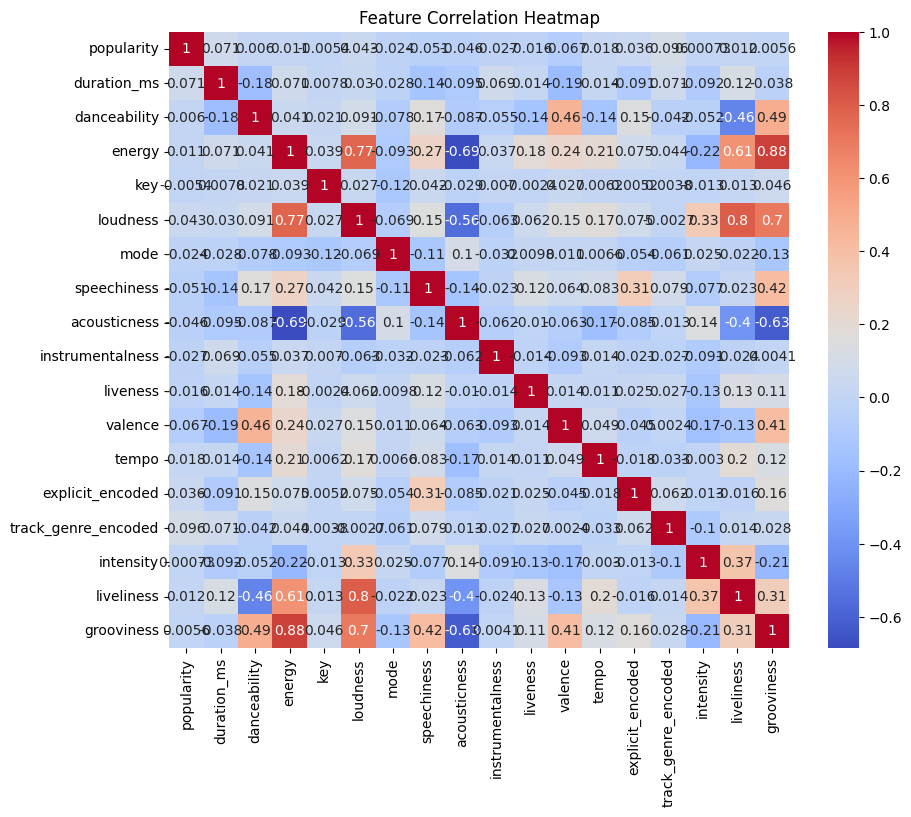

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_encode.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Scale Data

In [ ]:
from sklearn.preprocessing import StandardScaler

df_scaled = df_encode

'''# Scale the data
scaler = StandardScaler()
df_scaled[['duration_ms', 'energy', 'loudness', 'tempo']] = scaler.fit_transform(df[['duration_ms', 'energy', 'loudness', 'tempo']])

df_scaled.head()'''


"# Scale the data\nscaler = StandardScaler()\ndf_scaled[['duration_ms', 'energy', 'loudness', 'tempo']] = scaler.fit_transform(df[['duration_ms', 'energy', 'loudness', 'tempo']])\n\ndf_scaled.head()"

# Split Train Test

In [ ]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop('popularity', axis=1)
y = df_scaled['popularity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (66256, 17)
X_test shape:  (16565, 17)
y_train shape:  (66256,)
y_test shape:  (16565,)


# Neural Network Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Build the initial model
initial_model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1)  #output layer
])

# Compile the model
initial_model.compile(optimizer='adam',  # Adam optimizer
                    loss='mean_squared_error',
                    metrics=['mae'])

history = initial_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

test_loss, test_mae = initial_model.evaluate(X_test, y_test, verbose=1)
print(f'Initial Model Test Mean Absolute Error (MAE): {test_mae}')


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


829/829 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.4862 - mae: 0.9764 - val_loss: 0.9896 - val_mae: 0.8183
Epoch 2/10
829/829 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9745 - mae: 0.8094 - val_loss: 0.9660 - val_mae: 0.8061
Epoch 3/10
829/829 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9627 - mae: 0.8028 - val_loss: 0.9548 - val_mae: 0.7987
Epoch 4/10
829/829 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9355 - mae: 0.7886 - val_loss: 0.9495 - val_mae: 0.7957
Epoch 5/10
829/829 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9504 - mae: 0.7971 - val_loss: 0.9453 - val_mae: 0.7955
Epoch 6/10
829/829 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9366 - mae: 0.7889 - val_loss: 0.9438 - val_mae: 0.7948
Epoch 7/10
829/829 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.9440 - mae: 0.7935 - val_loss: 0.9428 - val_mae: 0.7920
Epoch 8/10
829/829 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9379 - mae: 0.7886 - val_loss: 0.9398 - val_mae: 0.7912
Epoch 9/10
829/829 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9366 

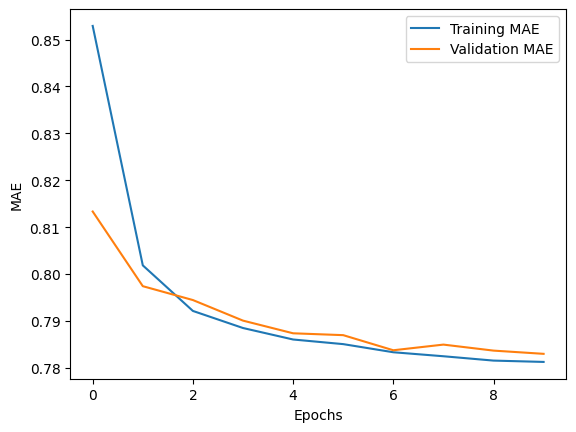

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

y_pred = initial_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error: {mape * 100:.2f}%')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

518/518 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Mean Squared Error: 0.9209665643778073
Root Mean Squared Error: 0.9596700289046268
Mean Absolute Percentage Error: 119.67%
R-squared: 0.07127600744260898


In [ ]:
baseline_mae = np.mean(np.abs(y_test - np.mean(y_train)))
print(f'Baseline MAE: {baseline_mae}')


Baseline MAE: 0.830520127851536


# Hyperparameter Tuning

In [ ]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.0 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam

def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units_1', min_value=32, max_value=128, step=32), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(hp.Int('units_2', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[0.01, 0.001, 0.0001])), loss='mean_squared_error', metrics=['mae'])
    return model

tuner = kt.Hyperband(build_model, objective='val_mae', max_epochs=50, directory='my_dir', project_name='regression_tuning')

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=50, validation_split=0.2)

# Retrieve the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hps.values}")

# Train the best model
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(X_train, y_train, epochs=50, validation_split=0.2)


Trial 62 Complete [00h 00m 32s]
val_mae: 0.7869037985801697

Best val_mae So Far: 0.7102885842323303
Total elapsed time: 00h 29m 03s
Best hyperparameters: {'units_1': 128, 'units_2': 128, 'learning_rate': 0.001, 'tuner/epochs': 50, 'tuner/initial_epoch': 17, 'tuner/bracket': 3, 'tuner/round': 3, 'tuner/trial_id': '0046'}
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1657/1657 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.9678 - mae: 0.8044 - val_loss: 0.9297 - val_mae: 0.7834
Epoch 2/50
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.9146 - mae: 0.7732 - val_loss: 0.9147 - val_mae: 0.7717
Epoch 3/50
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.8796 - mae: 0.7537 - val_loss: 0.8997 - val_mae: 0.7589
Epoch 4/50
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.8665 - mae: 0.7452 - val_loss: 0.8822 - val_mae: 0.7530
Epoch 5/50
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.8404 - mae: 0.7317 - val_loss: 0.8722 - val_mae: 0.7462
Epoch 6/50
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.8284 - mae: 0.7265 - val_loss: 0.8594 - val_mae: 0.7378
Epoch 7/50
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.8120 - mae: 0.7168 - val_loss: 0.8578 - val_mae: 0.7356
Epoch 8/50
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.7987 - mae: 0.7080 - val_loss: 0.8501 - val_mae: 0.7289
Epoch 9/50
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/st

# Best Model

In [ ]:
best_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(1)
])

# Compile the model
best_model.compile(optimizer=Adam(learning_rate=0.001),
                   loss='mean_squared_error',
                   metrics=['mae'])

# Train the model
history = best_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

test_loss, test_mae = best_model.evaluate(X_test, y_test, verbose=1)
print(f'Test Mean Absolute Error (MAE): {test_mae}')



Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1657/1657 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.9622 - mae: 0.8026 - val_loss: 0.9306 - val_mae: 0.7795
Epoch 2/50
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.9093 - mae: 0.7716 - val_loss: 0.9222 - val_mae: 0.7736
Epoch 3/50
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.8952 - mae: 0.7625 - val_loss: 0.9051 - val_mae: 0.7635
Epoch 4/50
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.8823 - mae: 0.7561 - val_loss: 0.8940 - val_mae: 0.7567
Epoch 5/50
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.8543 - mae: 0.7393 - val_loss: 0.8828 - val_mae: 0.7532
Epoch 6/50
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.8441 - mae: 0.7337 - val_loss: 0.8825 - val_mae: 0.7499
Epoch 7/50
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.8330 - mae: 0.7279 - val_loss: 0.8715 - val_mae: 0.7443
Epoch 8/50
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.8244 - mae: 0.7221 - val_loss: 0.8629 - val_mae: 0.7374
Epoch 9/50
1657/1657 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/st

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error: {mape * 100:.2f}%')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


518/518 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Mean Squared Error: 0.8628895773014609
Root Mean Squared Error: 0.9289184987400461
Mean Absolute Percentage Error: 156.82%
R-squared: 0.12984218497771627


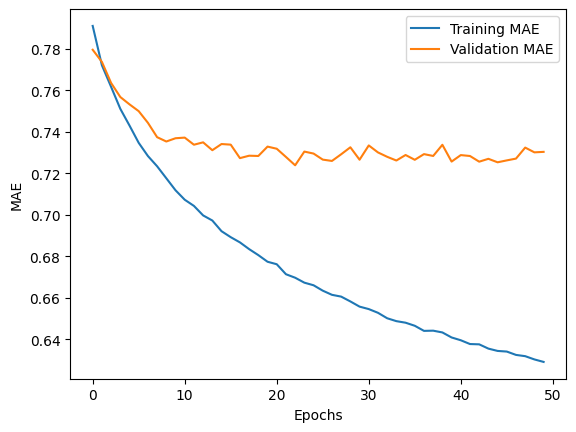

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

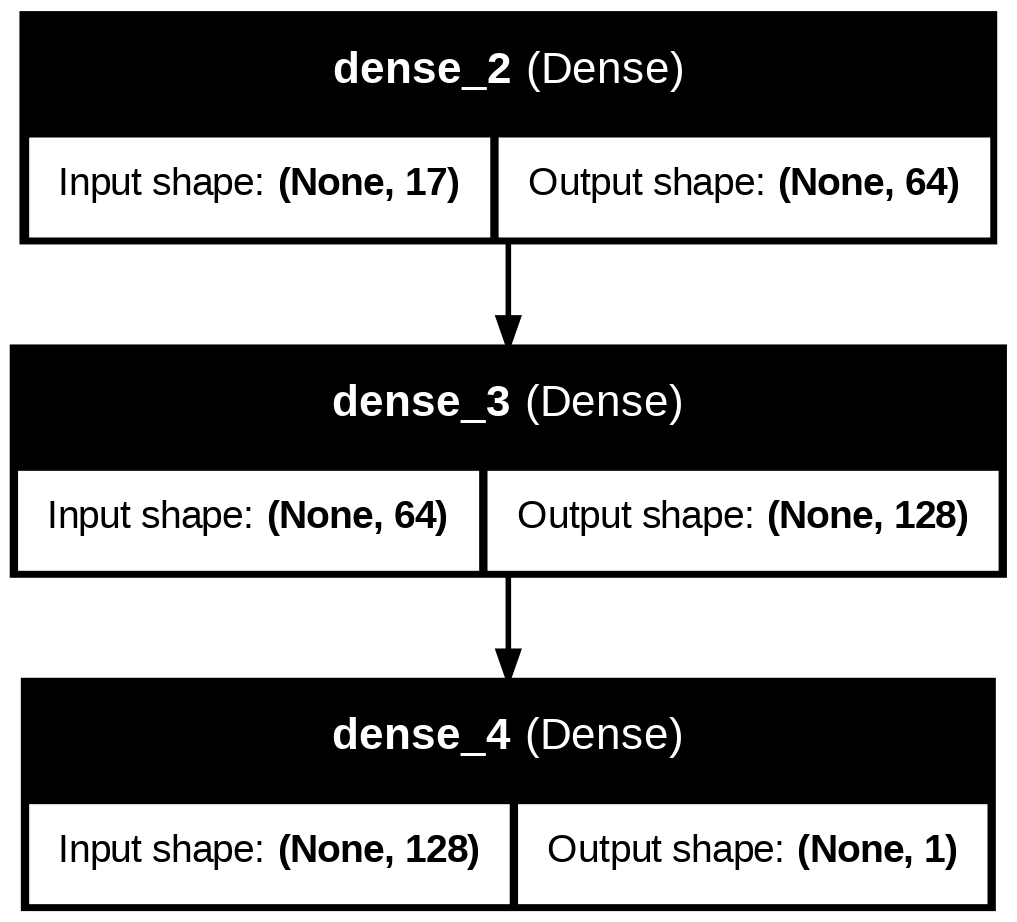

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(best_model, to_file='best_model.png', show_shapes=True, show_layer_names=True)


# H20 and AutoML

In [ ]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.8/265.8 MB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.6-py2.py3-none-any.whl size=265859786 sha256=7478d833bcfd7ded69b722ea505fcb82e9317983776680a206cabbad0ec55099
  Stored in directory: /root/.cache/pip/wheels/0c/95/eb/b449c73f478dbc4557b80170cf7f2aa6db15862877e9a63536
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML
from h2o.frame import H2OFrame
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

h2o.init()

h2o_df = H2OFrame(df_scaled)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

h2o_train = H2OFrame(pd.concat([X_train, y_train], axis=1))
h2o_test = H2OFrame(pd.concat([X_test, y_test], axis=1))

aml = H2OAutoML(max_models=20, max_runtime_secs=3600)
aml.train(x=X_train.columns.tolist(), y='popularity', training_frame=h2o_train)

aml.leader
aml.leaderboard

#h2o.shutdown(prompt=False)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.25" 2024-10-15; OpenJDK Runtime Environment (build 11.0.25+9-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.25+9-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpuo3wrxvx
  JVM stdout: /tmp/tmpuo3wrxvx/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpuo3wrxvx/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,2 months and 8 days
H2O_cluster_name:,H2O_from_python_unknownUser_bt5sf7
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_4_AutoML_1_20250110_163653,0.7794,0.607465,0.582766,nan,0.607465
GBM_3_AutoML_1_20250110_163653,0.794475,0.631191,0.605211,nan,0.631191
GBM_1_AutoML_1_20250110_163653,0.797673,0.636283,0.60481,nan,0.636283
DRF_1_AutoML_1_20250110_163653,0.805595,0.648983,0.609508,nan,0.648983
XRT_1_AutoML_1_20250110_163653,0.807852,0.652624,0.612482,nan,0.652624
GBM_2_AutoML_1_20250110_163653,0.814702,0.663739,0.628195,nan,0.663739
XGBoost_2_AutoML_1_20250110_163653,0.816573,0.666792,0.604704,nan,0.666792
XGBoost_1_AutoML_1_20250110_163653,0.822242,0.676082,0.601305,nan,0.676082
GBM_5_AutoML_1_20250110_163653,0.830181,0.6892,0.645661,nan,0.6892
XGBoost_3_AutoML_1_20250110_163653,0.832253,0.692644,0.644207,nan,0.692644


In [ ]:
# pkl file for model evaluation

import pickle
with open("neuralnetwork.pkl", "wb") as file:
    pickle.dump(best_model, file)